In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
splits = {'train': 'train.csv', 'test': 'test.csv'}
df = pd.read_csv("data.csv")

In [4]:
df.head()

,resume_text,job_description_text,label
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit


In [5]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum()]
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

df['job_description_text'] = df['job_description_text'].apply(preprocess_text)
df['resume_text'] = df['resume_text'].apply(preprocess_text)

vectorizer = TfidfVectorizer()

combined_text = df['job_description_text'].tolist() + df['resume_text'].tolist()

tfidf_matrix = vectorizer.fit_transform(combined_text)

job_desc_tfidf = tfidf_matrix[:len(df)]
resume_tfidf = tfidf_matrix[len(df):]

cosine_similarities = []
for i in range(len(df)):
    cosine_sim = cosine_similarity(job_desc_tfidf[i], resume_tfidf[i])
    cosine_similarities.append(cosine_sim[0][0])

df['cosine_similarity'] = cosine_similarities

In [6]:
df.head()

,resume_text,job_description_text,label,cosine_similarity
0,SummaryHighly motivated Sales Associate extens...,Net2Source total workforce solutions company r...,No Fit,0.049798
1,Professional SummaryCurrently working Caterpil...,Salas OBrien tell clients engineered impact pa...,No Fit,0.048330
2,SummaryI started construction career June 2017...,Schweitzer Engineering Laboratories SEL Infras...,No Fit,0.046239
3,SummaryCertified Electrical Foremanwith thirte...,Mizick Miller Company looking dynamic individu...,No Fit,0.016440
4,SummaryWith extensive experience analysis SDLC...,Life Capgemini Capgemini supports aspects thro...,No Fit,0.042048


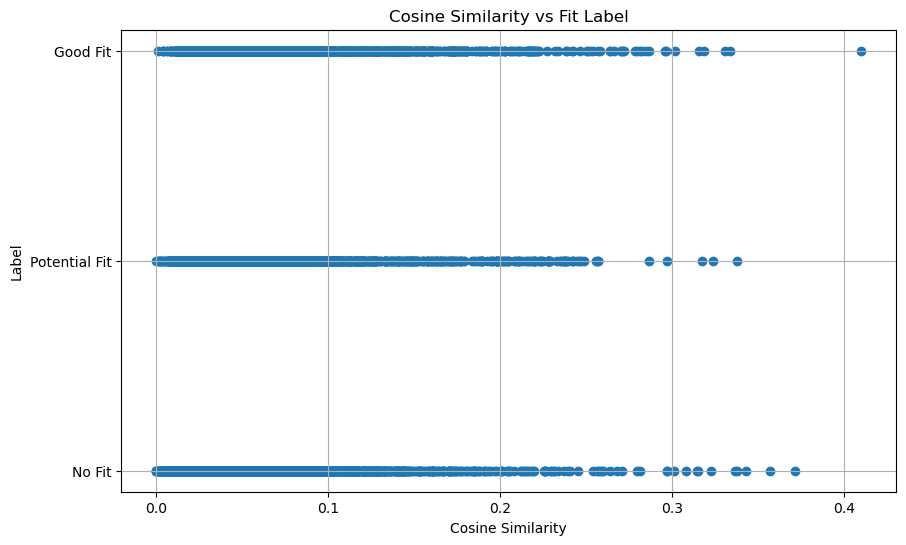

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['cosine_similarity'], df['label'])
plt.xlabel('Cosine Similarity')
plt.ylabel('Label')
plt.title('Cosine Similarity vs Fit Label')
plt.grid(True)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

correlation = df['cosine_similarity'].corr(df['label_encoded'])

print(f'Correlation between cosine similarity and label: {correlation}')

Correlation between cosine similarity and label: -0.07371746564016414
